In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('df_clean.csv')

df.head()

,lipase_level,gender,actual_age,is_confirmed_ap,charlson_comorbidity_index,aniongap_chemistry,bicarbonate_chemistry,bun_chemistry,calcium_chemistry,chloride_chemistry,glucose_chemistry,sodium_chemistry,potassium_chemistry,bilirubin_total_enzyme,amylase_enzyme,alt_enzyme,alp_enzyme,ast_enzyme,creatinine_albumin_ratio,severity
0,1222.0,0,64,1,4,20.0,28.0,11.0,9.6,110.0,144.0,143.0,4.5,1.7,302.0,523.0,252.0,333.0,0.250000,4
1,508.0,0,67,1,3,17.0,27.0,9.0,9.6,98.0,102.0,139.0,4.6,0.6,177.0,14.0,138.0,14.0,0.151515,3
2,1164.0,1,64,1,4,22.0,37.0,51.0,8.4,115.0,726.0,148.0,5.7,1.1,43.0,85.0,94.0,55.0,0.435897,0
3,677.0,1,58,1,2,27.0,29.0,82.0,9.6,112.0,371.0,150.0,5.8,5.6,231.0,257.0,719.0,303.0,2.000000,0
4,692.0,1,32,1,0,15.0,34.0,11.0,7.8,108.0,129.0,142.0,4.3,0.8,285.0,91.0,69.0,149.0,0.366667,3


In [3]:
df.columns

Index(['lipase_level', 'gender', 'actual_age', 'is_confirmed_ap',
       'charlson_comorbidity_index', 'aniongap_chemistry',
       'bicarbonate_chemistry', 'bun_chemistry', 'calcium_chemistry',
       'chloride_chemistry', 'glucose_chemistry', 'sodium_chemistry',
       'potassium_chemistry', 'bilirubin_total_enzyme', 'amylase_enzyme',
       'alt_enzyme', 'alp_enzyme', 'ast_enzyme', 'creatinine_albumin_ratio',
       'severity'],
      dtype='object')

In [2]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
# Select features for clustering
features = ['lipase_level', 'crp_level', 'amylase_level', 'age', 'gender', 'is_confirmed_ap']

# Extract the feature data
X = df[features]

# Identify categorical features
categorical_features = ['gender', 'is_confirmed_ap']
numerical_features = ['lipase_level', 'crp_level', 'amylase_level', 'age']
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# Standardize numerical features
scaler = StandardScaler()
X.iloc[:, ~X.columns.isin(categorical_features)] = scaler.fit_transform(X.iloc[:, ~X.columns.isin(categorical_features)])

# Initialize the K-Prototypes model
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)

# Fit the model to the data
clusters = kproto.fit_predict(X, categorical=categorical_indices)

# Add the cluster assignments to the original DataFrame
df['cluster'] = clusters

# View the cluster centroids
cluster_centers = kproto.cluster_centroids_
print(cluster_centers)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 25879, ncost: 318317.68685307633
Run: 1, iteration: 2/100, moves: 9084, ncost: 317201.36526026716
Run: 1, iteration: 3/100, moves: 2425, ncost: 317062.19051441824
Run: 1, iteration: 4/100, moves: 488, ncost: 317054.3278392687
Run: 1, iteration: 5/100, moves: 0, ncost: 317054.3278392687
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 26845, ncost: 318571.62079874333
Run: 2, iteration: 2/100, moves: 7745, ncost: 317527.9180548525
Run: 2, iteration: 3/100, moves: 6126, ncost: 316896.957918893
Run: 2, iteration: 4/100, moves: 1894, ncost: 316802.90128279605
Run: 2, iteration: 5/100, moves: 521, ncost: 316791.43065570545
Run: 2, iteration: 6/100, moves: 8, ncost: 316791.42464275926
Run: 2, iteration: 7/100, moves: 0, ncost: 316791.4246427592

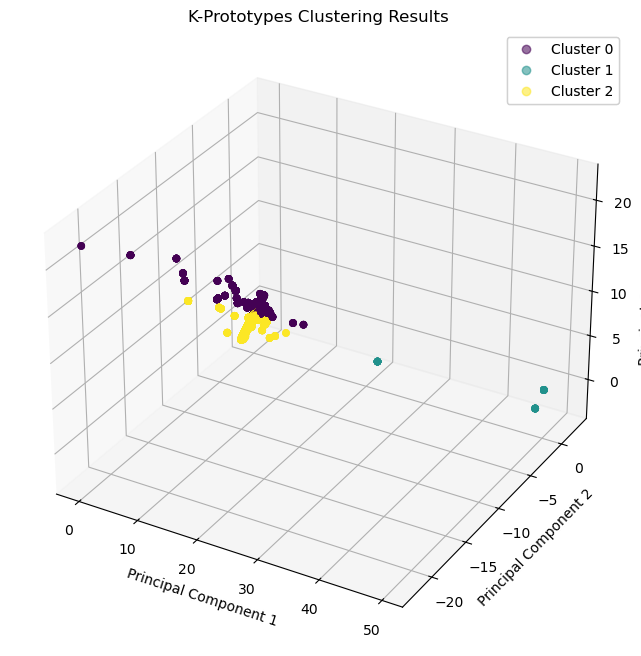

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['cluster'], cmap='viridis', alpha=0.5)

ax.set_title('K-Prototypes Clustering Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')


legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(3)], loc='upper right')
ax.add_artist(legend1)

plt.show()



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import plotly.express as px


# Select numerical features for clustering
features = ['lipase_level', 'crp_level', 'amylase_level', 'age']

# Extract the feature data
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster assignments to the original DataFrame
df['cluster'] = clusters

# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = clusters

In [ ]:
# Can run in colab but not in local
# Plot the 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='cluster',
    title='3D PCA of DBSCAN Clustering Results',
    labels={'cluster': 'Cluster'}
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed